# Time Series Segmentation
In this notebook, we test ClaSP against rival methods.

In [113]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [114]:
df_scores = pd.read_csv("segmentation_covering_unknown.csv")
df_scores

,dataset,ESPRESSO,BOCD,Window,PELT,BinSeg,FLOSS,ClaSP
0,Adiac,0.408,0.303,0.303,0.303,0.303,0.809,0.816
1,ArrowHead,0.701,0.483,0.500,0.500,0.500,0.995,0.996
2,Beef,0.487,0.344,0.500,0.500,0.500,0.935,0.848
3,BeetleFly,0.656,0.716,0.500,0.500,0.500,0.500,1.000
4,BirdChicken,0.459,0.366,0.500,0.500,0.500,0.500,0.500
5,CBF,0.505,0.613,0.342,0.342,0.342,0.861,0.680
6,Car,0.339,0.256,0.256,0.256,0.256,0.256,0.761
7,Chinatown,0.367,1.000,1.000,1.000,1.000,0.704,1.000
8,ChlorineConcentration,0.398,0.664,0.577,0.577,0.577,0.577,0.577
9,CinCECGTorso,0.496,0.551,0.337,0.337,0.337,0.337,0.828


Let's calculate the mean/median/std error.

In [115]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

ESPRESSO: mean_error=44.36
BOCD: mean_error=44.88
Window: mean_error=40.1
PELT: mean_error=58.1
BinSeg: mean_error=57.49
FLOSS: mean_error=56.74
ClaSP: mean_error=85.47


In [116]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].median() * 100, 2)}")

ESPRESSO: mean_error=43.2
BOCD: mean_error=40.1
Window: mean_error=34.2
PELT: mean_error=50.4
BinSeg: mean_error=50.4
FLOSS: mean_error=54.9
ClaSP: mean_error=96.3


In [117]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

ESPRESSO: std_error=15.51
BOCD: std_error=20.25
Window: std_error=22.89
PELT: std_error=24.74
BinSeg: std_error=25.64
FLOSS: std_error=25.22
ClaSP: std_error=18.84


Let's compute the wins per method.

In [118]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [119]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

ESPRESSO:wins=4 rank=4.6
BOCD:wins=6 rank=4.3
Window:wins=7 rank=4.3
PELT:wins=12 rank=2.9
BinSeg:wins=12 rank=2.8
FLOSS:wins=12 rank=3.1
ClaSP:wins=54 rank=1.5


Let's plot and output the ranks.

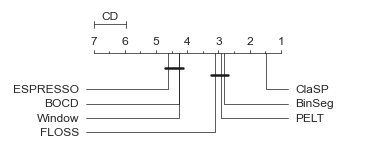

In [120]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.2, filename="../ranks.png")

In [121]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

ESPRESSO: rank=4.6
BOCD: rank=4.26667
Window: rank=4.25333
PELT: rank=2.90667
BinSeg: rank=2.81333
FLOSS: rank=3.12
ClaSP: rank=1.46667


Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [122]:
for rival in df_scores.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_scores[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs ESPRESSO: (wins/losses/ties): 7/68/0
ClaSP vs BOCD: (wins/losses/ties): 5/65/5
ClaSP vs Window: (wins/losses/ties): 0/60/15
ClaSP vs PELT: (wins/losses/ties): 7/56/12
ClaSP vs BinSeg: (wins/losses/ties): 7/56/12
ClaSP vs FLOSS: (wins/losses/ties): 9/53/13


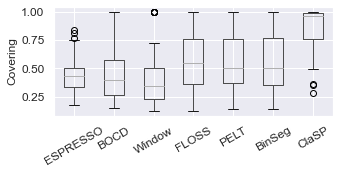

In [133]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores[["ESPRESSO", "BOCD", "Window", "FLOSS", "PELT", "BinSeg", "ClaSP"]].boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../boxplot.png", bbox_inches="tight")